In [1]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score


In [2]:
#Set Random seed
# np.random.seed(500)

# Add the Data using pandas
df = pd.read_csv(r"C:\Users\Acer\FYP_1.1_pro\audio\metadata_new\final_metadata\combined_csv_new_updated - Copy.csv",encoding='latin-1')



In [3]:
df.head()

,name_of_audio,feature,lable
0,E2_P1.wav,[-3.6422656e+02 1.3304326e+02 -2.4707306e+01 ...,1
1,E3_P1.wav,[-3.7986017e+02 1.1947180e+02 -3.1631770e+00 ...,1
2,E2_P10.wav,[-3.5354391e+02 1.4500945e+02 -3.1722630e+01 ...,1
3,E2_P11.wav,[-3.5276407e+02 1.3659334e+02 -3.1263487e+01 ...,1
4,E1_P12.wav,[-4.27301239e+02 1.29095963e+02 -3.96940780e+...,1


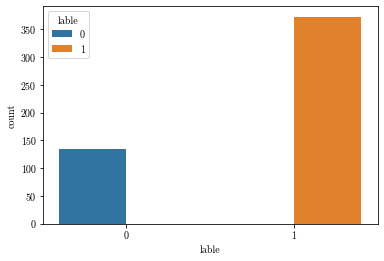

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

CSV_FILE = pd.read_csv(r"C:\Users\Acer\FYP_1.1_pro\audio\metadata_new\final_metadata\combined_csv_new_updated - Copy.csv")
plt.rcParams['font.sans-serif']= "cmr10"
sns.countplot(x='lable',hue='lable',data=CSV_FILE)
plt.show()

In [5]:
# samples = np.float32(df.feature)
# labels = np.array(df.lable)

# rand = np.random.RandomState(421)
# shuffle = rand.permutation(len(samples))
# samples = samples[shuffle]
# labels = labels[shuffle]

In [6]:
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(df.feature, df.lable, test_size=0.3)
X_train, X_test, y_train, y_test = train_test_split(df.feature, df.lable, test_size=0.3)

In [7]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [8]:
print(vectorizer.vocabulary_)

{'0255029e': 450, '02': 364, '3107405e': 5032, '7144880e': 10732, '00': 0, '2981239e': 4853, '01': 203, '7508610e': 11199, '6131258e': 9332, '0649352e': 1096, '7673106e': 11392, '5137749e': 7975, '0568892e': 968, '9328928e': 13453, '1222100e': 2109, '0858490e': 1470, '2667608e': 4356, '6799309e': 10290, '7856631e': 11631, '6124554e': 9322, '8455260e': 12392, '2536995e': 4147, '3113565e': 5037, '3783755e': 6050, '9836905e': 14073, '7874091e': 11655, '2267365e': 3749, '4301468e': 6781, '0973163e': 1674, '5503168e': 8483, '6579687e': 9959, '5446968e': 8415, '1040056e': 1791, '9058971e': 13137, '5815884e': 8928, '2826633e': 4601, '1653543e': 2811, '6284976e': 9563, '7412908e': 11083, '3430882e': 5498, '6888409e': 10417, '2844520e': 4629, '7613282e': 11324, '3209622e': 5176, '8888893e': 12933, '1407655e': 2419, '7900901e': 11688, '2726415e': 4458, '0129576e': 255, '0683424e': 1160, '2768693e': 4523, '0391769e': 692, '9839854e': 14081, '8084278e': 11913, '6880083e': 10405, '9996352e': 14247,

In [9]:
print(X_train)

  (0, 11324)	0.11866175558843538
  (0, 4629)	0.11866175558843538
  (0, 10417)	0.11866175558843538
  (0, 5498)	0.11866175558843538
  (0, 11083)	0.11866175558843538
  (0, 9563)	0.11866175558843538
  (0, 2811)	0.11866175558843538
  (0, 4601)	0.11866175558843538
  (0, 8928)	0.11866175558843538
  (0, 13137)	0.11866175558843538
  (0, 1791)	0.11866175558843538
  (0, 8415)	0.11866175558843538
  (0, 9959)	0.11866175558843538
  (0, 8483)	0.11866175558843538
  (0, 1674)	0.11866175558843538
  (0, 6781)	0.11866175558843538
  (0, 3749)	0.11866175558843538
  (0, 11655)	0.11866175558843538
  (0, 14073)	0.11866175558843538
  (0, 6050)	0.11866175558843538
  (0, 5037)	0.11866175558843538
  (0, 4147)	0.11866175558843538
  (0, 12392)	0.11866175558843538
  (0, 9322)	0.11866175558843538
  (0, 11631)	0.11866175558843538
  :	:
  (354, 4473)	0.12126121337002312
  (354, 2827)	0.12126121337002312
  (354, 1861)	0.12126121337002312
  (354, 12613)	0.12126121337002312
  (354, 6977)	0.12126121337002312
  (354, 11353)	

In [10]:
print(y_train)

125    1
481    1
215    0
272    1
26     0
      ..
327    1
321    1
207    1
231    0
199    1
Name: lable, Length: 355, dtype: int64


In [11]:
print(X_test)

  (0, 364)	0.07179581586177382
  (0, 203)	0.5025707110324167
  (0, 0)	0.8615497903412858
  (1, 13068)	0.24516880574016803
  (1, 6776)	0.24516880574016803
  (1, 5287)	0.21767867039694383
  (1, 4721)	0.22908810742463256
  (1, 2888)	0.3909687486391241
  (1, 2071)	0.31176567762124446
  (1, 1903)	0.4398531041848799
  (1, 1726)	0.5799948236480624
  (2, 2734)	0.45840514442912084
  (2, 2242)	0.4505230974466875
  (2, 1903)	0.39319598919266946
  (2, 1846)	0.6574880807366453
  (3, 11822)	0.20463557017417733
  (3, 364)	0.14652840058318917
  (3, 203)	0.47621730189536476
  (3, 0)	0.8425383033533377
  (4, 364)	0.033222774709254776
  (4, 203)	0.36545052180180254
  (4, 0)	0.9302376918591336
  (5, 364)	0.0726432712292148
  (5, 203)	0.544824534219111
  (5, 0)	0.8353976191359702
  :	:
  (145, 364)	0.07179581586177382
  (145, 203)	0.5025707110324167
  (145, 0)	0.8615497903412858
  (146, 364)	0.06967330142916177
  (146, 203)	0.4180398085749706
  (146, 0)	0.9057529185791029
  (147, 364)	0.1075552109073112
  

In [12]:
print(y_test)

422    1
376    0
464    1
436    1
447    1
      ..
159    0
444    1
293    1
190    1
92     1
Name: lable, Length: 153, dtype: int64


In [13]:
# NB Model

In [14]:
from sklearn.naive_bayes import MultinomialNB 
from sklearn import svm 
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report


In [15]:
#fit the training dataset on the NB classifier
model = MultinomialNB()
model.fit(X_train, y_train)
# predict the labels on validation dataset
predictions = model.predict(X_test)
# Use accuracy_score function to get the accuracy
print('Naive Bayes Accuracy Score: ', accuracy_score(y_test.astype(str), predictions.astype(str)) * 100)

Naive Bayes Accuracy Score:  75.16339869281046


In [16]:
# SVM Model

In [17]:
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train,y_train)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(X_test)
# Use accuracy_score function to get the accuracy
print("SVM model Accuracy: ",accuracy_score(predictions_SVM, y_test)*100)

SVM model Accuracy:  75.16339869281046


In [18]:
# Save Model Using Pickle
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import pickle

In [19]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(SVM, open(filename, 'wb'))


In [20]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_train,y_train)

# print(result)

print('Accurancy on unseen data: ',result*100)

Accurancy on unseen data:  76.05633802816901


In [21]:
 # Testing unseen audio data previously***************predicotion eka

In [22]:
import librosa

filename="F:/project/FYP_1.1_pro/S40_P10_M.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)

[-3.80959625e+02  1.06641136e+02  1.43122807e+01  3.46517830e+01
 -1.22231493e+01 -9.92035484e+00 -1.20498447e+01 -4.61018801e+00
 -1.64270859e+01  4.30630088e-01 -1.30181637e+01 -2.35350657e+00
 -2.66925812e+00 -2.33583260e+00  2.86317682e+00 -2.64952004e-01
 -7.10066509e+00  6.44649208e-01 -5.93560934e+00 -5.96408319e+00
 -5.40745640e+00 -8.21523190e+00 -4.33218813e+00 -9.00313854e+00
 -3.42272305e+00 -4.87034369e+00 -6.43167496e+00 -4.97964096e+00
 -6.03873968e+00 -3.00913143e+00 -4.71055365e+00 -4.71162081e+00
 -4.14764309e+00 -2.79271913e+00 -2.68595409e+00 -5.36914968e+00
 -4.14365959e+00 -2.68424392e+00 -1.94504702e+00 -2.51829576e+00]
[[-3.80959625e+02  1.06641136e+02  1.43122807e+01  3.46517830e+01
  -1.22231493e+01 -9.92035484e+00 -1.20498447e+01 -4.61018801e+00
  -1.64270859e+01  4.30630088e-01 -1.30181637e+01 -2.35350657e+00
  -2.66925812e+00 -2.33583260e+00  2.86317682e+00 -2.64952004e-01
  -7.10066509e+00  6.44649208e-01 -5.93560934e+00 -5.96408319e+00
  -5.40745640e+00 -

In [23]:

# ********************************Predict class for S13_P7_F.wav

predicted_label=SVM.predict(mfccs_scaled_features)
print(predicted_label)

prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

ValueError: X.shape[1] = 40 should be equal to 14251, the number of features at training time

In [24]:
# Gives error still can not fix it.try it later********************

In [25]:
# try with CNN*** model

In [26]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import glob
import IPython.display as ipd
import random
%pylab inline

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


C:\Users\Acer\.conda\envs\tensorflow\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [27]:
metadata=pd.read_csv('audio/metadata_new/final_metadata/combined_csv_new_updated - Copy.csv')
df = pd.read_csv('audio/metadata_new/final_metadata/combined_csv_new_updated - Copy.csv')
df.head()

,name_of_audio,feature,lable
0,E2_P1.wav,[-3.6422656e+02 1.3304326e+02 -2.4707306e+01 ...,1
1,E3_P1.wav,[-3.7986017e+02 1.1947180e+02 -3.1631770e+00 ...,1
2,E2_P10.wav,[-3.5354391e+02 1.4500945e+02 -3.1722630e+01 ...,1
3,E2_P11.wav,[-3.5276407e+02 1.3659334e+02 -3.1263487e+01 ...,1
4,E1_P12.wav,[-4.27301239e+02 1.29095963e+02 -3.96940780e+...,1


In [28]:
# ipd.Audio('audio/rec/fold1/S1_P15_F.wav')
data, sampling_rate = librosa.load('audio/rec - Copy/S1_P1_F.wav')

In [29]:
data

array([ 0.        ,  0.        ,  0.        , ..., -0.00143572,
       -0.00139209, -0.00141668], dtype=float32)

In [30]:
sampling_rate

22050

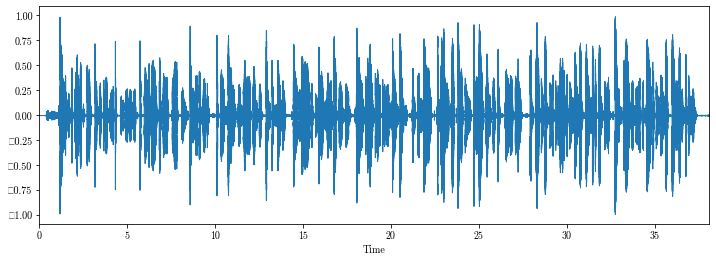

In [31]:
plt.figure(figsize=(12,4))
librosa.display.waveplot(data, sr=sampling_rate)

lable: 1


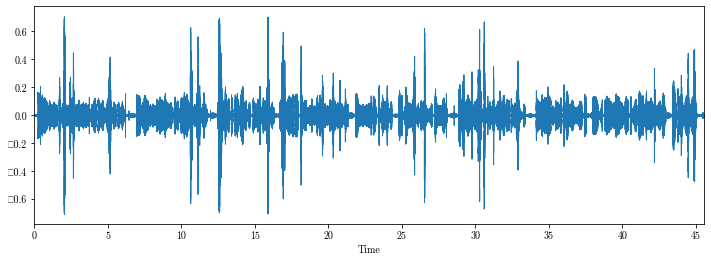

In [32]:
index = random.choice(df.index)

print('lable:', df['lable'][index])
data, sampling_rate = librosa.load('audio/rec - Copy/'+str(df['name_of_audio'][index]))

plt.figure(figsize=(12,4))
librosa.display.waveplot(data, sr=sampling_rate)

<AxesSubplot:xlabel='lable', ylabel='count'>

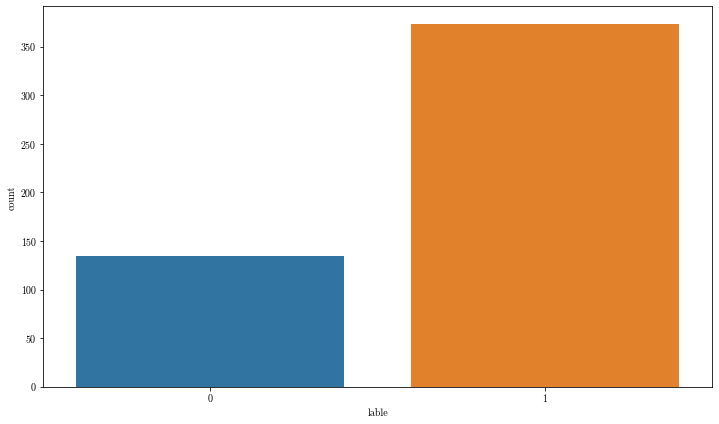

In [33]:
import seaborn as sns
plt.figure(figsize=(12,7))
sns.countplot(df['lable'])

In [34]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [35]:
import numpy as np
from tqdm import tqdm
import os
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join('audio/rec - Copy/', str(row.name_of_audio))
    final_class_labels=row["lable"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

508it [05:33,  1.52it/s]


In [36]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-364.22656, 133.04326, -24.707306, 8.948652, ...",1
1,"[-379.86017, 119.4718, -3.163177, 25.166592, -...",1
2,"[-353.5439, 145.00945, -31.72263, 8.87748, 17....",1
3,"[-352.76407, 136.59334, -31.263487, 8.083315, ...",1
4,"[-427.30124, 129.09596, -3.9694078, 8.760965, ...",1


In [127]:
extracted_features_df.to_csv('audio/metadata_new/final_metadata/extracted_features_df.csv')
print("done")

done


In [37]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [38]:
X.shape

(508, 40)

In [39]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

In [40]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [41]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [42]:
X_train

array([[-384.79132  ,  126.83416  ,   22.044748 , ...,    3.6588137,
           4.157282 ,    4.989248 ],
       [-332.5388   ,   92.562675 ,   -3.9492354, ...,    5.115012 ,
           4.4112234,    2.8012795],
       [-315.8667   ,  120.47542  ,   20.410995 , ...,   -2.1051085,
          -1.2823454,   -1.5356203],
       ...,
       [-392.28574  ,   88.3984   ,   -4.571233 , ...,   -1.4070433,
          -2.783642 ,   -1.0058346],
       [-393.10715  ,  157.4563   ,  -13.183333 , ...,    4.2225337,
           3.0959253,    2.988069 ],
       [-339.63928  ,  100.59851  ,   -1.3436158, ...,   -1.5343856,
          -0.6541061,   -2.4956307]], dtype=float32)

In [43]:
y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [44]:
X_train.shape

(406, 40)

In [45]:
X_test.shape

(102, 40)

In [46]:
y_train.shape

(406, 2)

In [47]:
y_test.shape

(102, 2)

In [48]:
###### -------- Model Creation -------- ######

In [49]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [51]:
### No of classes
num_labels=y.shape[1]

In [52]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4100      
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               2

In [54]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [58]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 200
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/200
 1/13 [=>............................] - ETA: 0s - loss: 0.1525 - accuracy: 0.9375
Epoch 00001: val_loss improved from inf to 1.43361, saving model to saved_models\audio_classification.hdf5
13/13 [==============================] - 0s 5ms/step - loss: 0.1334 - accuracy: 0.9384 - val_loss: 1.4336 - val_accuracy: 0.8725
Epoch 2/200
 1/13 [=>............................] - ETA: 0s - loss: 0.1514 - accuracy: 0.9375
Epoch 00002: val_loss improved from 1.43361 to 1.33071, saving model to saved_models\audio_classification.hdf5
13/13 [==============================] - 0s 3ms/step - loss: 0.1436 - accuracy: 0.9433 - val_loss: 1.3307 - val_accuracy: 0.9020
Epoch 3/200
 1/13 [=>............................] - ETA: 0s - loss: 0.0571 - accuracy: 1.0000
Epoch 00003: val_loss improved from 1.33071 to 1.23929, saving model to saved_models\audio_classification.hdf5
13/13 [==============================] - 0s 3ms/step - loss: 0.2071 - accuracy: 0.9163 - val_loss: 1.2393 - val_accuracy: 0.9118

In [59]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1]*100)

86.27451062202454


In [60]:
X_test[1]

array([-3.3424139e+02,  1.1067206e+02, -6.6630416e+00,  4.1293573e+00,
       -1.1308483e+01, -1.0980946e+01, -1.5250362e+01,  1.9236928e+00,
       -1.4809805e+01,  2.3802032e-01, -7.7702599e+00,  3.6280439e+00,
       -5.6303148e+00, -6.6174512e+00, -7.5932426e+00, -5.3561540e+00,
       -2.5885587e+00, -5.4182224e+00, -5.7990346e+00, -5.9867935e+00,
       -1.1707730e+00, -2.6819625e+00, -3.1655645e-01,  2.5990316e-01,
       -9.8999280e-01,  5.7512655e+00, -1.5841848e+00,  4.2109928e-01,
        1.8964884e+00,  3.1722341e+00,  2.6149845e+00,  5.7462988e+00,
        2.8583210e+00,  1.4889371e+00,  3.4892721e+00, -8.1730686e-02,
       -3.9798820e-01,  8.0889344e-01, -1.4317317e+00, -6.2499964e-01],
      dtype=float32)

In [61]:
model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

In [62]:
# Testing Some Test Audio Data

In [137]:
filename="audio/test/S80_P9_F.wav"
# S53_P16_F.wav
# S15_P12_F
# S47_P5_M
# S66_P13_F
# S80_P9_F
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict_classes(mfccs_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[-4.06961548e+02  1.25544815e+02  7.24437094e+00  2.35064487e+01
 -8.29647255e+00 -4.68114346e-01 -2.05127888e+01  1.53409410e+00
 -5.73644924e+00 -1.06801784e+00 -1.51590385e+01 -2.45112920e+00
 -3.70279741e+00 -1.19295165e-01 -4.92135525e+00 -3.15901160e+00
 -1.81216884e+00 -9.29667568e+00 -2.30823541e+00 -1.34051651e-01
 -1.22944412e+01  2.05694342e+00 -2.61654949e+00 -6.84767962e+00
  1.81218970e+00 -1.43325150e+00  1.41474020e+00  9.30639625e-01
  1.17483747e+00 -1.70769259e-01  3.82723331e+00  2.68230748e+00
 -1.94721535e-01 -1.28275621e+00  1.23170626e+00  2.12459874e+00
 -5.59372365e-01  1.30786240e+00 -9.25461411e-01  1.23108868e-02]
[[-4.06961548e+02  1.25544815e+02  7.24437094e+00  2.35064487e+01
  -8.29647255e+00 -4.68114346e-01 -2.05127888e+01  1.53409410e+00
  -5.73644924e+00 -1.06801784e+00 -1.51590385e+01 -2.45112920e+00
  -3.70279741e+00 -1.19295165e-01 -4.92135525e+00 -3.15901160e+00
  -1.81216884e+00 -9.29667568e+00 -2.30823541e+00 -1.34051651e-01
  -1.22944412e+01  

array([1])

In [138]:
print(prediction_class)

[1]


In [139]:
# !pip install SpeechRecognition

In [140]:
# !pip install pydub

In [141]:
# Testing with some text data to give feedback

In [142]:
# importing libraries
import speech_recognition as sr
import os
from pydub import AudioSegment
from pydub.silence import split_on_silence

In [143]:
import speech_recognition as sr

if (prediction_class == 1):
    print("Well Done.You have pronunced words correctly.")
else:

    r = sr.Recognizer()

    with sr.AudioFile(filename) as source:
        audio = r.listen(source)
        try:
            text = r.recognize_google(audio)
            print('working on...')
            print(text)
        except:
            print('Sorry...run again...')

Well Done.You have pronunced words correctly.


In [136]:

import re

txt = text

#Check if "ain" is present at the end of a WORD:

# re.findall(r"\band\b|\bor\b|\bnot\b", "These are oranges and apples and pears, but not pinapples or ..")

# torsional mode of vibration is a consequence of
set1 = re.findall(r"\bbowling\b|\bball\b|\browing\b|\brow\b|\bhall\b|\bholes\b", txt)
set2 = re.findall(r"\btelephone\b", txt)
set3 = re.findall(r"\bfruit\b|\bfly\b|\bfraction\b|\bfan\b", txt)
set4 = re.findall(r"\bpool\b|\bpenalties\b|\btransportation\b|\btransported\b", txt)
set5 = re.findall(r"\bseat\b|\bseats\b|\bcent\b", txt)
set6 = re.findall(r"\bzones\b|\blizard\b|\bzoo\b", txt)
set7 = re.findall(r"\bwaist\b|\bvibration\b|\bwind\b|\bweight\b", txt)

# print(x)


if set1:
  print("Error: Confusing /o/ and /ɔ /..Have pronunciation errors when speaking bowling, rowers, hall like words.")
if set2:
  print("Error: Overuse of /ɔ / rather than /o/..Have pronunciation errors when speaking phone, yoghut like words.")
if set3:
  print("Error: Confusing /p/ and /f/..Have pronunciation errors when speaking fan, pan, profit like words.")
if set4:
  print("Error: Overuse of /f /..Have pronunciation errors when speaking Airport, pool like words.")
if set5:
  print("Error: Use of [ʃ] in place of [s]..Have pronunciation errors when speaking cell, sell, seat like words.")
if set6:
  print("Error: Use of [s] in place of [z]..Have pronunciation errors when speaking zoo, zip like words.")
if set7:
  print("Error: Use of [wr] and [ar]..Have pronunciation errors when speaking winter, win, west, vest, vantage like words.")





Error: Use of [ʃ] in place of [s]..Have pronunciation errors when speaking cell, sell, seat like words.
